<a href="https://colab.research.google.com/github/KristynaPijackova/Exercises/blob/main/MLF_FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASSIFICATION OF ROOM OCCUPANCY
MLF FINAL PROJECT

**Author:** Kristyna Pijackova

## Task Description

The project’s task is to classify the number of persons present in the room rom 60 GHz signal transmission.The dataset consists of snapshots of signal in delay-Doppler domain that represent the reflections from the targets (humans) at some distance from the receiver moving with some velocity. To explain: the faster the person moves, the higher Doppler frequency shifts it generates. The farther from the receiver the person is, the higher delay it generates. Examples of delay-Doppler snapshot are shown on Fig. 1 for one, two, and three persons in the room. Note that these examples represent almost ideal records, while the real records may be distorted by noise, reflections, missed targets etc...

---

## Available Data:
- csv files
- color figures in png format
- BW figures in png format

## Dataset Description:

> #### Training data:
> - data and labels
> - xxx data available
> - class distribution 

> #### Testing data:
> - data only, evaluation after submitting to Kaggle
> - xxx data available
> - class distribution

## Main Goal:
- Classification of persons present in the room from a given snapshot
- One/Two/Three persons in the room

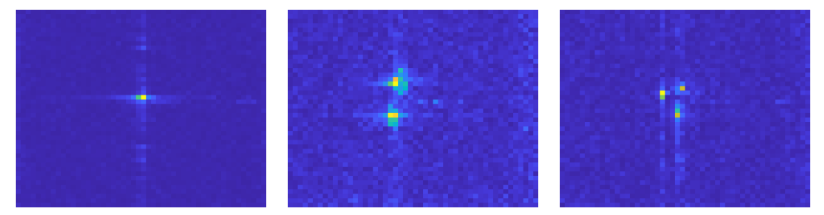

## Import Libraries

In [1]:
from google.colab import drive
import os
import numpy as np
import pandas as pd
from natsort import natsorted 
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import SGD, RMSprop, Adam
     


## Load and Preprocess Data 🔄

In [2]:
drive.mount('/content/gdrive')
dataset_folder_path = '/content/gdrive/MyDrive/Dataset/'
train_csv = 'Train/CSV'
train_color = 'Train/Color'
labels = 'y_train.csv'
test_color = 'Test/Color'
test_csv = 'Test/CSV'

Mounted at /content/gdrive


In [8]:
train_csv_list = os.listdir(os.path.join(dataset_folder_path, train_csv))
train_csv_list = natsorted(train_csv_list)

test_csv_list = os.listdir(os.path.join(dataset_folder_path, test_csv))
test_csv_list = natsorted(test_csv_list)

y_train_csv = pd.read_csv(os.path.join(dataset_folder_path, labels))

### Data correction 🔧

In [9]:
y_train_csv = y_train_csv.drop('id', axis=1)
y_train_csv = y_train_csv-1
num_classes = len(y_train_csv['target'].unique())
y_train_csv= to_categorical(y_train_csv, num_classes=num_classes)
print(y_train_csv)

[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


Scan through the data and find invalid format (two "decimal" points), replace it and save as new file of valid data.

In [ ]:
# train_data = []
# for i, csv_name in enumerate(train_csv_list):
#     print(i)
#     df = pd.read_csv(os.path.join(dataset_folder_path, train_csv, csv_name), header=None)
#     df.drop(columns=df.columns[0], axis=1, inplace=True)
#     arr = df.to_numpy()  # numpy array of the original values
#     df = df.apply(pd.to_numeric, errors='coerce')  # replace all non valid calues with nan
#     idxs_i, idxs_j = np.asarray(df.isnull()).nonzero()  # find indexes of nan values

#     for idx_i, idx_j in zip(idxs_i, idxs_j):
#         non_valid_value = arr[idx_i, idx_j]
#         if non_valid_value.count('.') == 2:
#             a, b, c = non_valid_value.split('.')
#             valid_value = (a + '.' + (b+c))
#             df.iloc[idx_i, idx_j] = float(valid_value)
            
#     arr = df.to_numpy()  # numpy array of the original but valid values
#     train_data.append(arr)

In [ ]:
# test_data = []
# for i, csv_name in enumerate(test_csv_list):
#     print(i)
#     df = pd.read_csv(os.path.join(dataset_folder_path, test_csv, csv_name), header=None)
#     df.drop(columns=df.columns[0], axis=1, inplace=True)
#     arr = df.to_numpy()  # numpy array of the original values
#     df = df.apply(pd.to_numeric, errors='coerce')  # replace all non valid calues with nan
#     idxs_i, idxs_j = np.asarray(df.isnull()).nonzero()  # find indexes of nan values

#     for idx_i, idx_j in zip(idxs_i, idxs_j):
#         non_valid_value = arr[idx_i, idx_j]
#         if non_valid_value.count('.') == 2:
#             a, b, c = non_valid_value.split('.')
#             valid_value = (a + '.' + (b+c))
#             df.iloc[idx_i, idx_j] = float(valid_value)
            
#     arr = df.to_numpy()  # numpy array of the original but valid values
#     test_data.append(arr)

Save the data!

In [ ]:
# np.save('train_data.npy', np.array(train_data), allow_pickle=True)

In [ ]:
# np.save('test_data.npy', np.array(test_data), allow_pickle=True)

### Load the valid data! 🔢

In [10]:
x_train = np.load('/content/gdrive/MyDrive/Dataset_MLF/sorted/train_data.npy', allow_pickle=True)
x_test = np.load('/content/gdrive/MyDrive/Dataset_MLF/sorted/test_data.npy', allow_pickle=True)

### Data Normalization

In [11]:
norm = x_train.max()
x_train_csv = x_train/norm
x_test_csv = x_test/norm

print(x_train.max())
print(x_test.max())

print(x_train_csv.max())
print(x_test_csv.max())

43007.0
43967.0
1.0
1.0223219475899272


In [12]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train_csv, test_size=0.2)
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((6623, 45, 51), (6623, 3), (1656, 45, 51), (1656, 3))

## Train a model

In [18]:
from keras.layers import Conv2D, LeakyReLU

cnn_in = keras.layers.Input(shape=(45,51, 1))

cnn = keras.layers.Conv2D(filters=32, kernel_size=5, activation='swish')(cnn_in)
cnn = keras.layers.MaxPool2D(pool_size=2)(cnn)


cnn = keras.layers.Conv2D(filters=32, kernel_size=5, activation='swish')(cnn)
cnn = keras.layers.MaxPool2D(pool_size=2)(cnn)

cnn = keras.layers.Conv2D(filters=16, kernel_size=3, activation='swish')(cnn)
cnn = keras.layers.MaxPool2D(pool_size=2)(cnn)


cnn = keras.layers.Flatten()(cnn)
# cnn = keras.layers.Dense(128, activation='swish')(cnn)
# cnn = keras.layers.Dropout(rate=0.6)(cnn)
cnn = keras.layers.Dense(64, activation='swish')(cnn)
cnn = keras.layers.Dropout(rate=0.4)(cnn)
cnn_out = keras.layers.Dense(num_classes, activation='softmax')(cnn)

model_cnn = keras.models.Model(cnn_in, cnn_out)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "cnn_model.h5", save_best_only=True, monitor="val_loss"),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.3, patience=3, min_lr=0.00007),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1)
    ]

optimizer = keras.optimizers.Adam(learning_rate=0.0005)

model_cnn.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
     

In [21]:
!pip install keras-tuner
import keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 5.7 MB/s eta 0:00:00


In [189]:
def build_model(hp):
    # create model object
    model = keras.Sequential([
    keras.layers.Input(shape=(45,51, 1)),
    
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=8, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='swish'),

    keras.layers.MaxPool2D(pool_size=2),

    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=8, max_value=64, step=16),        
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='swish'),

    keras.layers.MaxPool2D(pool_size=2),

    keras.layers.Conv2D(
        filters=hp.Int('conv_3_filter', min_value=8, max_value=64, step=16),
        kernel_size=hp.Choice('conv_3_kernel', values = [3,5]),
        activation='swish'),

    keras.layers.Flatten(),

    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='swish'),

    
    keras.layers.Dropout(rate=0.4),
  
    keras.layers.Dense(
        units=hp.Int('dense_2_units', min_value=32, max_value=128, step=16),
        activation='swish'),

    keras.layers.Dropout(rate=0.4),

    keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-3, 5e-4])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

bayes_tuner = keras_tuner.BayesianOptimization(
    hypermodel=build_model,
    objective='val_accuracy',
    max_trials=10,
    num_initial_points=None,
    alpha=0.0001,
    beta=2.6,
    seed=None,
    overwrite=True, 
    directory='/content/hp_tuning_bayes',
    project_name='hp_nn_bayes',
)      
       

bayes_tuner.search_space_summary()
     


Search space summary
Default search space size: 9
conv_1_filter (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
conv_1_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
conv_2_filter (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 64, 'step': 16, 'sampling': 'linear'}
conv_2_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
conv_3_filter (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 64, 'step': 16, 'sampling': 'linear'}
conv_3_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
dense_1_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
dense_2_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.001, 'conditions': [

In [190]:
history = bayes_tuner.search(x_train, y_train, batch_size=128, epochs=50, verbose=2, validation_data= (x_valid, y_valid))

Trial 10 Complete [00h 01m 08s]
val_accuracy: 0.6461352705955505

Best val_accuracy So Far: 0.9710144996643066
Total elapsed time: 00h 10m 00s


Model # 2 - 98.309 % accuracy

In [191]:
for h_param in [f"conv_{i}_filter" for i in range(1, 4)] + [f"conv_{i}_kernel" for i in range(1,4)] + [f"dense_{i}_units" for i in range(1, 3)] + ['learning_rate']:
  print(h_param, bayes_tuner.get_best_hyperparameters()[0].get(h_param))

conv_1_filter 120
conv_2_filter 40
conv_3_filter 56
conv_1_kernel 5
conv_2_kernel 3
conv_3_kernel 5
dense_1_units 96
dense_2_units 80
learning_rate 0.0005


In [192]:
# Get the top 2 models.
models = bayes_tuner.get_best_models(num_models=2)

best_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=(45,51, 1))
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 41, 47, 120)       3120      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 23, 120)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 21, 40)        43240     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 10, 40)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 6, 56)          56056     
                                                                 
 flatten (Flatten)           (None, 1680)              0

In [193]:
best_hps = bayes_tuner.get_best_hyperparameters(num_trials=1)[0]
hypermodel = bayes_tuner.hypermodel.build(best_hps)

In [194]:
hypermodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 41, 47, 120)       3120      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 23, 120)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 21, 40)        43240     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 9, 10, 40)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 6, 56)          56056     
                                                                 
 flatten_1 (Flatten)         (None, 1680)             

In [195]:
history = hypermodel.fit(x_train, y_train, batch_size=128, epochs=100, verbose=2, validation_data= (x_valid, y_valid))


Epoch 1/100
52/52 - 6s - loss: 4.3758 - accuracy: 0.5051 - val_loss: 0.8228 - val_accuracy: 0.6226 - 6s/epoch - 114ms/step
Epoch 2/100
52/52 - 1s - loss: 0.9152 - accuracy: 0.5698 - val_loss: 0.6680 - val_accuracy: 0.7391 - 1s/epoch - 26ms/step
Epoch 3/100
52/52 - 1s - loss: 0.7685 - accuracy: 0.6592 - val_loss: 0.5925 - val_accuracy: 0.7917 - 1s/epoch - 27ms/step
Epoch 4/100
52/52 - 1s - loss: 0.6744 - accuracy: 0.7202 - val_loss: 0.4618 - val_accuracy: 0.8436 - 1s/epoch - 26ms/step
Epoch 5/100
52/52 - 1s - loss: 0.5819 - accuracy: 0.7719 - val_loss: 0.4746 - val_accuracy: 0.8418 - 1s/epoch - 26ms/step
Epoch 6/100
52/52 - 1s - loss: 0.5145 - accuracy: 0.8040 - val_loss: 0.3338 - val_accuracy: 0.8877 - 1s/epoch - 26ms/step
Epoch 7/100
52/52 - 1s - loss: 0.4435 - accuracy: 0.8301 - val_loss: 0.2977 - val_accuracy: 0.8883 - 1s/epoch - 27ms/step
Epoch 8/100
52/52 - 1s - loss: 0.4355 - accuracy: 0.8359 - val_loss: 0.3034 - val_accuracy: 0.8841 - 1s/epoch - 28ms/step
Epoch 9/100
52/52 - 1s 

In [196]:
score = hypermodel.evaluate(x_valid, y_valid, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 0.07446996867656708
Test accuracy: 98.36956262588501 %


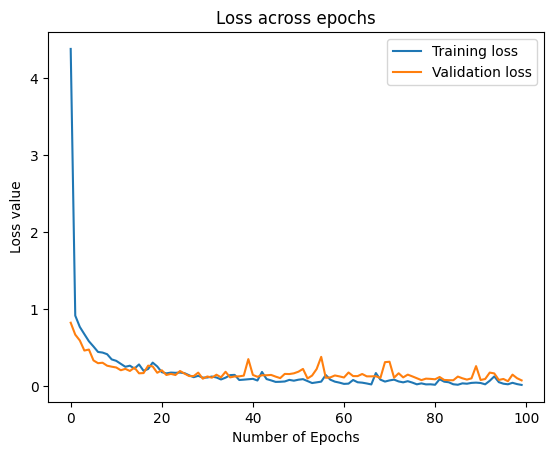

In [197]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss across epochs")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss value")
plt.legend(['Training loss', 'Validation loss'])

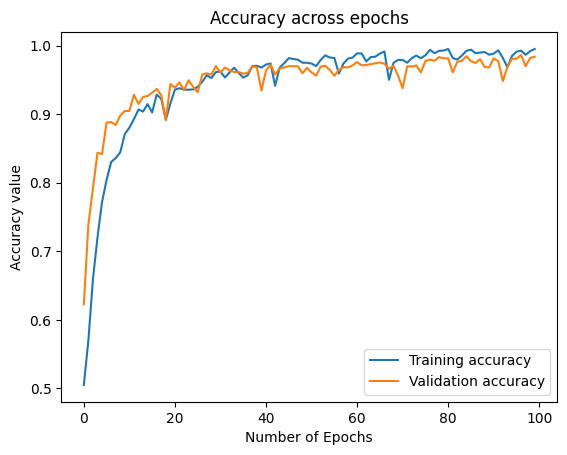

In [198]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy across epochs")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy value")
plt.legend(['Training accuracy', 'Validation accuracy'])

Model # 1 - 97.830 % accuracy

In [44]:
for h_param in [f"conv_{i}_filter" for i in range(1, 4)] + [f"conv_{i}_kernel" for i in range(1,4)] + [f"dense_{i}_units" for i in range(1, 3)] + ['learning_rate']:
  print(h_param, bayes_tuner.get_best_hyperparameters()[0].get(h_param))

conv_1_filter 56
conv_2_filter 40
conv_3_filter 40
conv_1_kernel 5
conv_2_kernel 5
conv_3_kernel 3
dense_1_units 80
dense_2_units 80
learning_rate 0.001


In [30]:
# Get the top 2 models.
models = bayes_tuner.get_best_models(num_models=2)

best_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=(45,51, 1))
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 41, 47, 56)        1456      
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 43, 40)        56040     
                                                                 
 conv2d_2 (Conv2D)           (None, 35, 41, 40)        14440     
                                                                 
 flatten (Flatten)           (None, 57400)             0         
                                                                 
 dense (Dense)               (None, 80)                4592080   
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 dense_2 (Dense)             (None, 3)                 2

In [ ]:
best_hps = bayes_tuner.get_best_hyperparameters(num_trials=1)[0]
hypermodel = bayes_tuner.hypermodel.build(best_hps)

In [57]:
hypermodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 41, 47, 56)        1456      
                                                                 
 conv2d_4 (Conv2D)           (None, 37, 43, 40)        56040     
                                                                 
 conv2d_5 (Conv2D)           (None, 35, 41, 40)        14440     
                                                                 
 flatten_1 (Flatten)         (None, 57400)             0         
                                                                 
 dense_3 (Dense)             (None, 80)                4592080   
                                                                 
 dense_4 (Dense)             (None, 80)                6480      
                                                                 
 dense_5 (Dense)             (None, 3)                

In [47]:
history = hypermodel.fit(x_train, y_train, batch_size=128, epochs=50, verbose=2, validation_data= (x_valid, y_valid))


Epoch 1/50
52/52 - 6s - loss: 13.8091 - accuracy: 0.6150 - val_loss: 0.5450 - val_accuracy: 0.7959 - 6s/epoch - 115ms/step
Epoch 2/50
52/52 - 2s - loss: 0.3976 - accuracy: 0.8467 - val_loss: 0.2987 - val_accuracy: 0.8961 - 2s/epoch - 46ms/step
Epoch 3/50
52/52 - 2s - loss: 0.1991 - accuracy: 0.9286 - val_loss: 0.2086 - val_accuracy: 0.9269 - 2s/epoch - 45ms/step
Epoch 4/50
52/52 - 2s - loss: 0.1107 - accuracy: 0.9633 - val_loss: 0.1307 - val_accuracy: 0.9511 - 2s/epoch - 40ms/step
Epoch 5/50
52/52 - 2s - loss: 0.0643 - accuracy: 0.9810 - val_loss: 0.1638 - val_accuracy: 0.9511 - 2s/epoch - 43ms/step
Epoch 6/50
52/52 - 2s - loss: 0.0525 - accuracy: 0.9840 - val_loss: 0.1213 - val_accuracy: 0.9607 - 2s/epoch - 41ms/step
Epoch 7/50
52/52 - 2s - loss: 0.0199 - accuracy: 0.9952 - val_loss: 0.0934 - val_accuracy: 0.9680 - 2s/epoch - 43ms/step
Epoch 8/50
52/52 - 2s - loss: 0.0205 - accuracy: 0.9955 - val_loss: 0.1168 - val_accuracy: 0.9656 - 2s/epoch - 44ms/step
Epoch 9/50
52/52 - 2s - loss: 

In [48]:
score = hypermodel.evaluate(x_valid, y_valid, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 0.08556968718767166
Test accuracy: 98.00724387168884 %


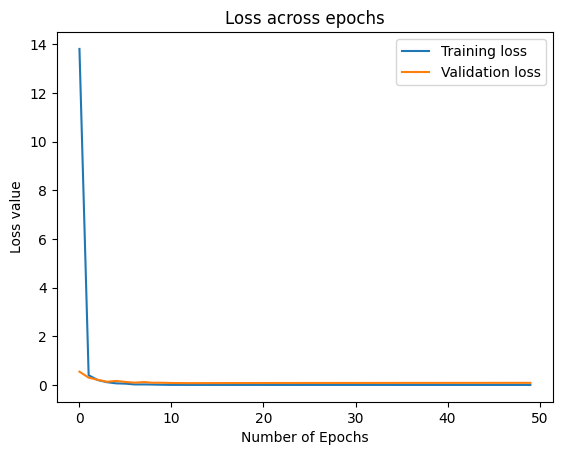

In [59]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss across epochs")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss value")
plt.legend(['Training loss', 'Validation loss'])

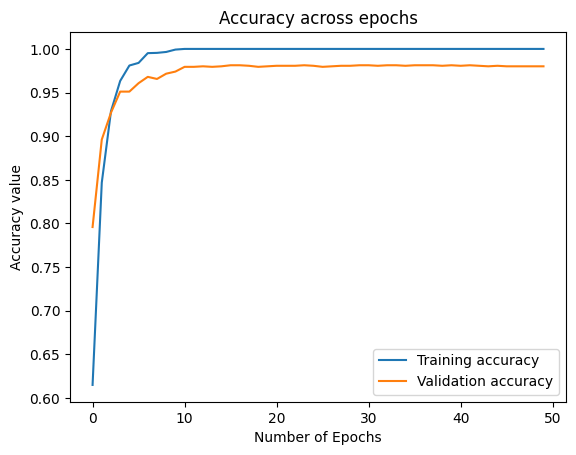

In [60]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy across epochs")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy value")
plt.legend(['Training accuracy', 'Validation accuracy'])

In [202]:
hypermodel.save('/content/gdrive/MyDrive/Dataset_MLF/')

## Get Predictions

In [ ]:
hypermodel = keras.models.load_model('keras.models.load_model')

In [199]:
pred = hypermodel.predict(x_test)
indices = [[i,np.argmax(v)+1] for i,v in enumerate(pred)]

111/111 [==============================] - 1s 4ms/step


In [200]:
y_test = pd.DataFrame(indices, columns=['id', 'target'])
y_test 

,id,target
0,0,2
1,1,2
2,2,1
3,3,3
4,4,3
...,...,...
3544,3544,1
3545,3545,2
3546,3546,1
3547,3547,1


In [201]:
y_test.to_csv('y_test.csv', index=False)

In [ ]:
def display_random_images_csv(x_data: np.array, count: int = 3) -> None:
  index = np.arange(len(x_data))
  selected_ind = np.random.choice(index, count)
  selected_img = x_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)
  plt.figure(figsize=(10,10))
  plt.imshow(concat_img, cmap='viridis')
  plt.axis('off')
  plt.show()

display_random_images_csv(x_train_csv)

## Visualize what's going on inside

### Let's get a testing image and look at it

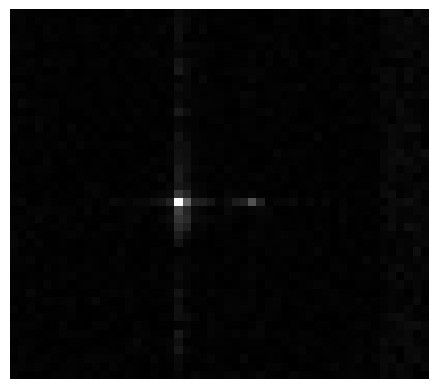

In [209]:
img = x_test[-1]
predict_img = np.expand_dims(img, axis=0)


plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

### Model's layers and their outputs

In [210]:
layer_names = [layer.name for layer in hypermodel.layers]
layer_outputs = [layer.output for layer in hypermodel.layers]
     

for layer in hypermodel.layers:
    print("\nLayer name: \t{} \nLayer output: \t{}".format(layer.name, layer.output))




Layer name: 	conv2d_3 
Layer output: 	KerasTensor(type_spec=TensorSpec(shape=(None, 41, 47, 120), dtype=tf.float32, name=None), name='conv2d_3/IdentityN:0', description="created by layer 'conv2d_3'")

Layer name: 	max_pooling2d_2 
Layer output: 	KerasTensor(type_spec=TensorSpec(shape=(None, 20, 23, 120), dtype=tf.float32, name=None), name='max_pooling2d_2/MaxPool:0', description="created by layer 'max_pooling2d_2'")

Layer name: 	conv2d_4 
Layer output: 	KerasTensor(type_spec=TensorSpec(shape=(None, 18, 21, 40), dtype=tf.float32, name=None), name='conv2d_4/IdentityN:0', description="created by layer 'conv2d_4'")

Layer name: 	max_pooling2d_3 
Layer output: 	KerasTensor(type_spec=TensorSpec(shape=(None, 9, 10, 40), dtype=tf.float32, name=None), name='max_pooling2d_3/MaxPool:0', description="created by layer 'max_pooling2d_3'")

Layer name: 	conv2d_5 
Layer output: 	KerasTensor(type_spec=TensorSpec(shape=(None, 5, 6, 56), dtype=tf.float32, name=None), name='conv2d_5/IdentityN:0', descri

### Activation maps

We can pass through the layers in our model and see, what fiters were activated and how much for the predicted image we currently choose to pass through the model.

In [211]:
activation_model = tf.keras.models.Model(hypermodel.input, layer_outputs)
activations = activation_model.predict(predict_img)

1/1 [==============================] - 0s 210ms/step


(1, 41, 47, 120)


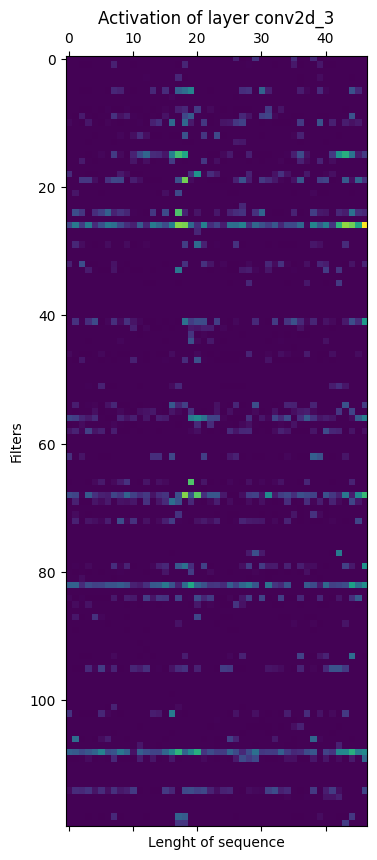

In [232]:
LAYER = 0  # choose which layer you want to see

activation_layer = activations[LAYER]
print(activation_layer.shape)
activation_layer = np.transpose(activation_layer[0,:,:,:],(0,2,1)) # reshape
fig, ax = plt.subplots(figsize=(20,10))
ax.matshow(activation_layer[0,:,:],  cmap='viridis')
plt.title('Activation of layer ' + layer_names[LAYER])
ax.grid(False)
ax.set_xlabel('Lenght of sequence')
ax.set_ylabel('Filters')
fig.show()

### Filters

By extracting weights, we can see, how the filter, which are then applied on the processed image, look like...

In [233]:
# retrieve weights from the second hidden layer
filters, biases = hypermodel.layers[LAYER].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

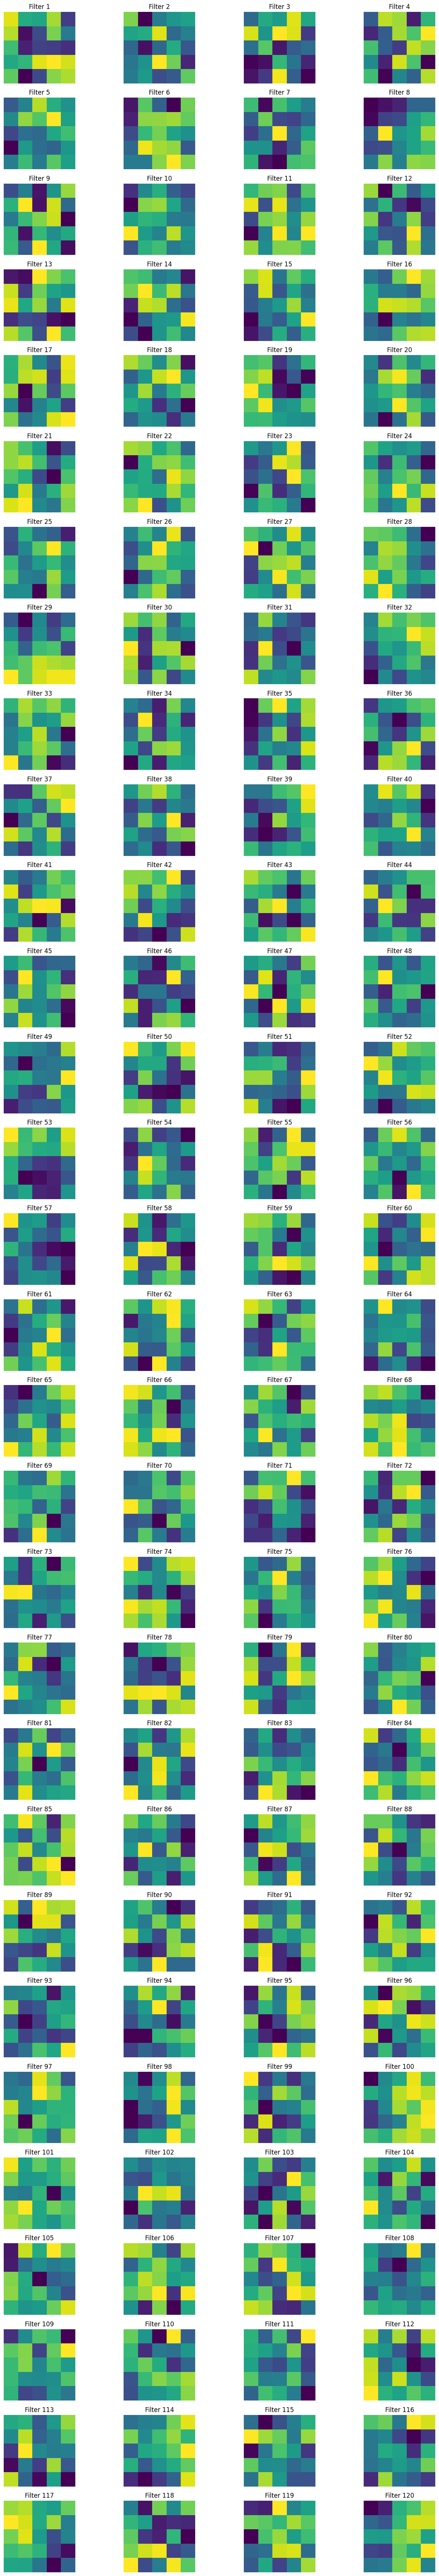

<Figure size 640x480 with 0 Axes>

In [234]:
# plot first few filters
n_filters= filters.shape[-1]
ix = 1
plt.figure(figsize=(16, n_filters*3)) 
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(1):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 4, ix)
		plt.title(f'Filter {i+1}')
		plt.imshow(f[:, :, j])
		plt.axis('off')
		ix += 1
# show the figure
plt.show()
plt.tight_layout()

     


### Feature maps

...shows us, how the image looks like, after each filter is applied.

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 45, 51, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 41, 47, 120)       3120      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 23, 120)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 21, 40)        43240     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 9, 10, 40)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 6, 56)          5605

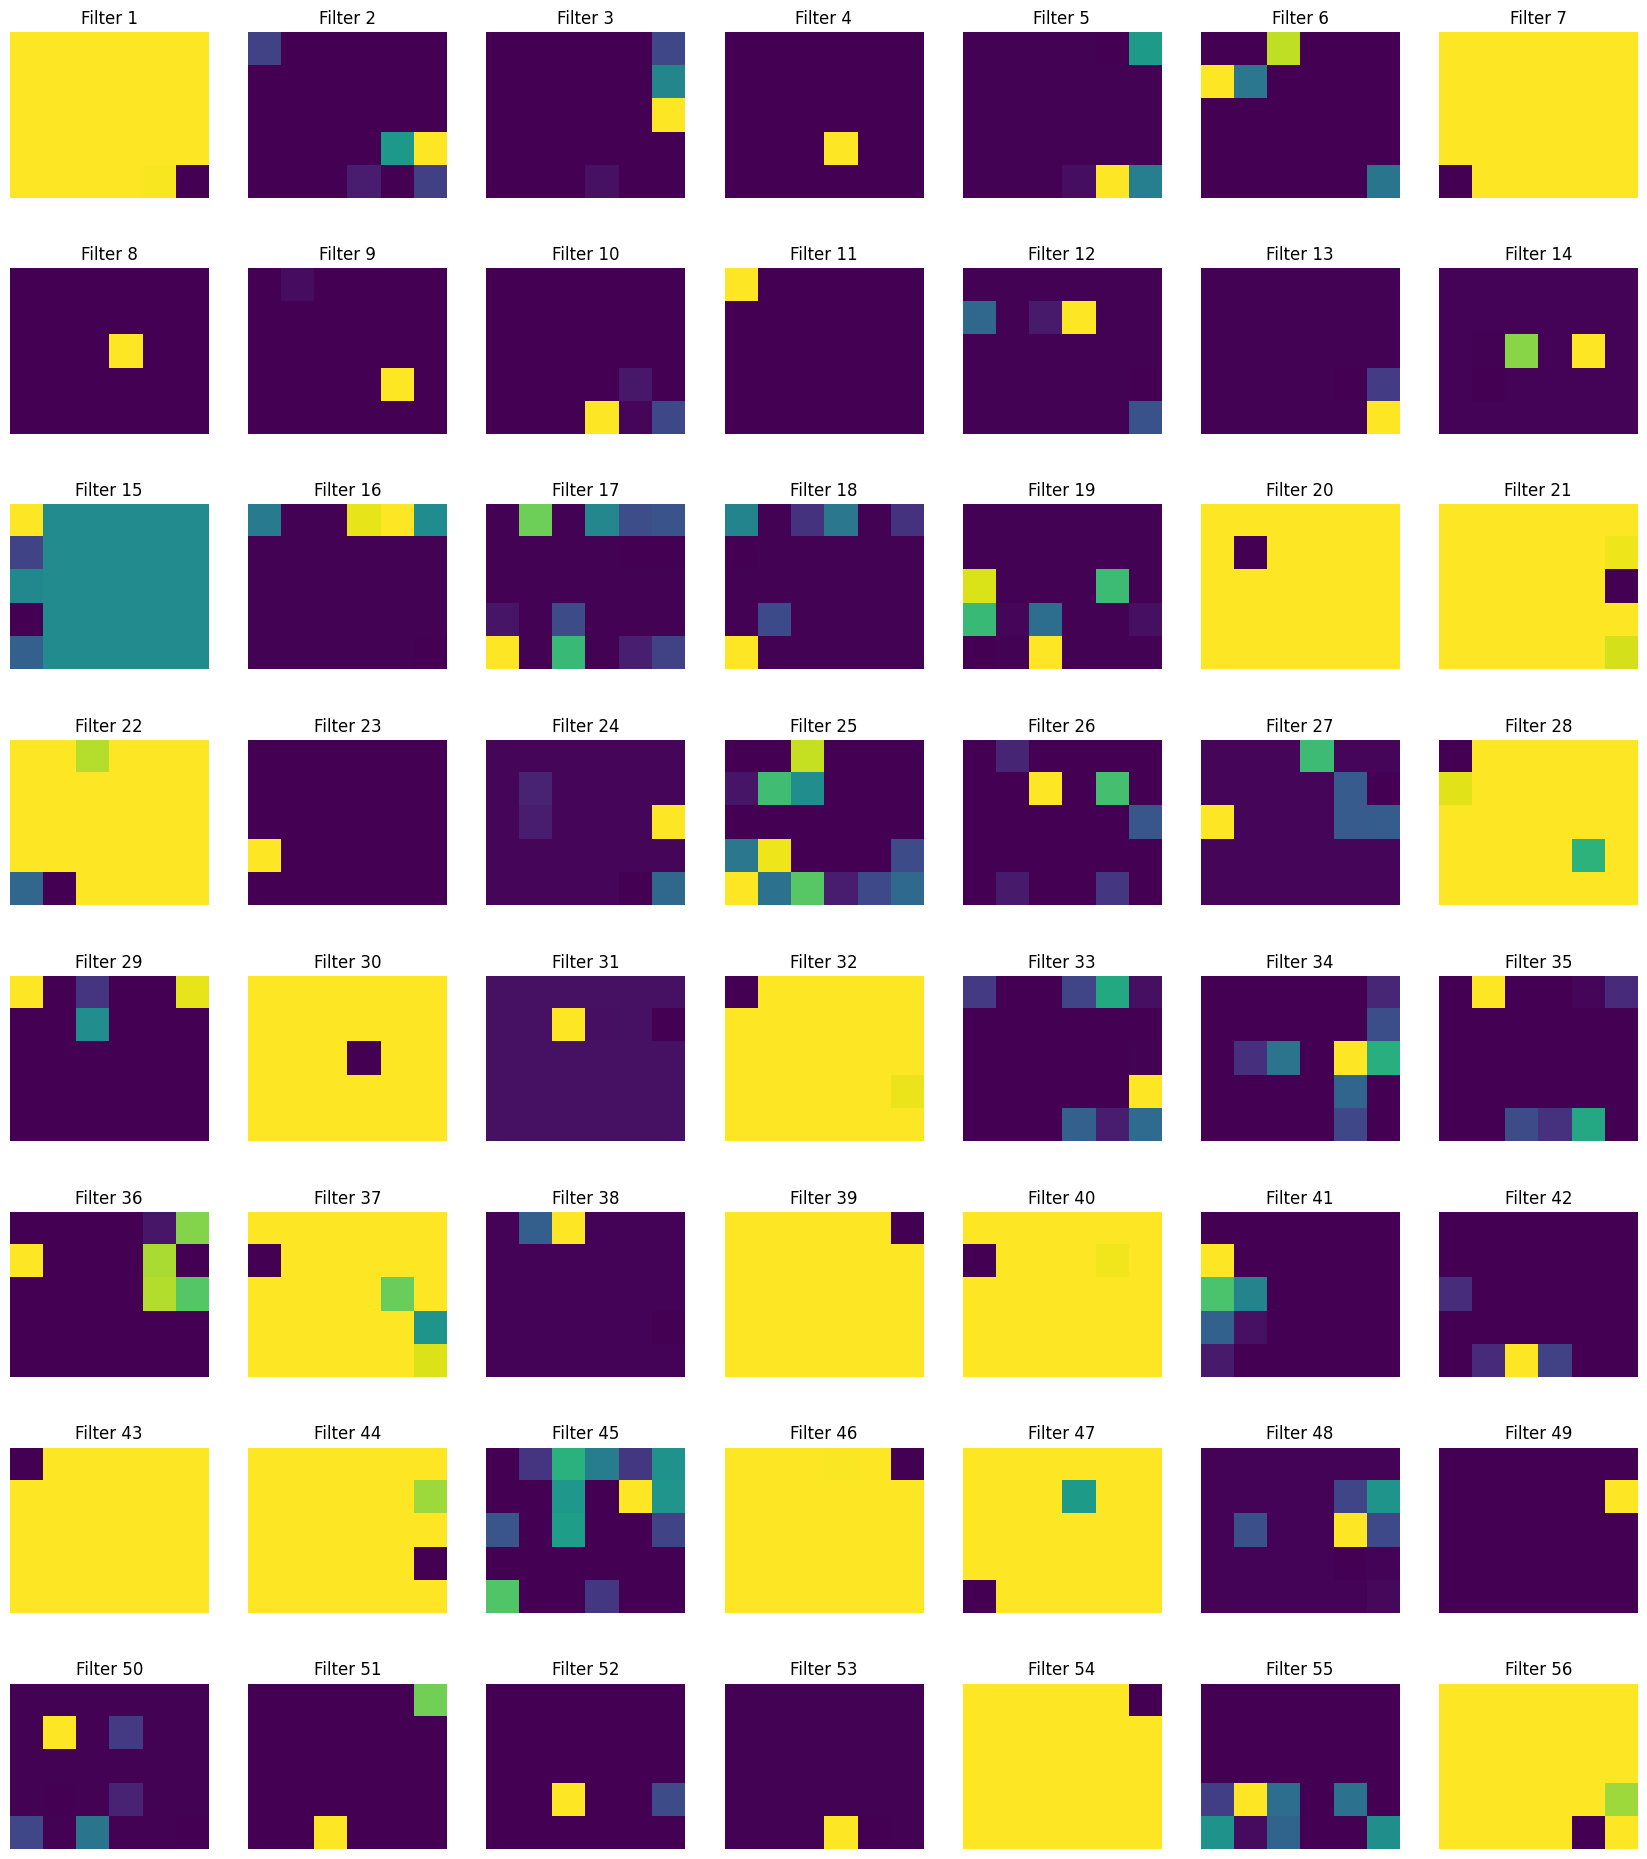

In [230]:
output = keras.models.Model(inputs=hypermodel.inputs, outputs=hypermodel.layers[LAYER].output)
output.summary()
# load the image with the required shape

feature_maps = output.predict(predict_img)
# plot all 64 maps in an 8x8 squares
rows = 8
columns = int(feature_maps.shape[-1]/rows)
ix = 1
plt.figure(figsize=(columns*3, rows*3)) 
for _ in range(rows):
    for _ in range(columns):
		# specify subplot and turn of axis
        ax = plt.subplot(rows, columns, ix)
        plt.title(f'Filter {ix}')
        plt.imshow(feature_maps[0, :, :, ix-1])
        plt.axis('off')
        ix += 1
        
     


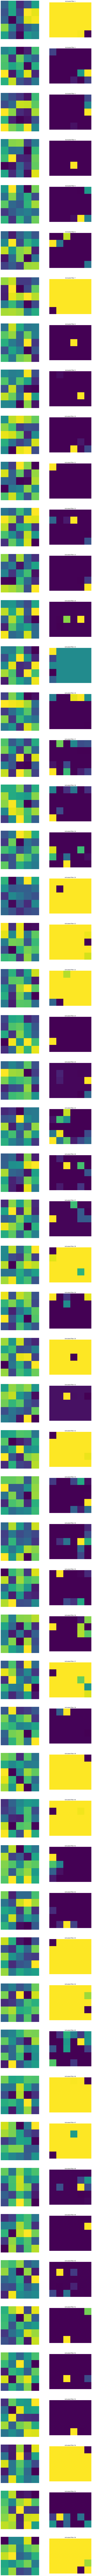

<Figure size 640x480 with 0 Axes>

In [231]:
# plot first few filters
n_filters= filters.shape[-1]
ix = 1
plt.figure(figsize=(16, n_filters*8)) 
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(1):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 2, ix)
		plt.imshow(f[:, :, j])
		plt.axis('off')
		ix += 1
		# show the img actitvation as well
		if j == 0:
			ax = plt.subplot(n_filters, 2, ix) 
			plt.title(f'Activated filter {i+1}')
			plt.imshow(feature_maps[0, :, :, i])
			plt.axis('off')
			ix += 1
# show the figure
plt.show()
plt.tight_layout()
